## Darwin Project Simulation
####  Jeff Valentic | valen136@msu.edu
####  4/16/2020

# Simulating the Evolution of Two Competing Populations

## Background and Motivation

I chose this topic for my semester project because I wanted a challenge. I spent some time on youtube and google researching similar concepts and decided it was something that I could accomplish.

There is a very interesting youtube account, Primer, who creates models very similar to the one I have made. When I was trying to figure out what a project like this required, I used Primers videos for inspiration and even based some of my program rules around his projects.

I did not directly copy code from Primer, although we both created a model for similar situations. There are some major differences in our models.

## Questions

1. Can I create an environment that is condusive to artificial life?
2. Will the creatures living in this environment be able to evolve to create a final population that is more suited to this environment
3. What traits will each creature favor?

## Methodology - What all this code is actually doing!

1. New population and new food map are created given the initial values.
2. Each creature takes a turn looking for food on the map. Turn ends when creature runs out of energy or finds food
3. Creatures are split into 3 categories
    - Survived - Creature successfully got food, but not enough to reproduce.
    - Reproduced - Creature got maximum amount of food possible and was enough to reproduce
    - Died - Creature either got no food, or creature was a Zebra that got "eaten" by a Lion
4. Creatures in the "Reproduced" category proceed to produce an offspring that is a close match to the parent.
    - 33% chance to mutate speed (+/-)1
    - 33% chance to mutate size (+/-)1
    - 33% chance to create an identical offspring
5. New offspring is added to the total population
6. Remove dead creatures from total population
7. Population continues to repeat steps 2-6 until either one of the species goes extinct, or their population values are constant for more than 10 loops.
8. Create multiple excell files from data collected
9. Use darwin_plotting.ipynb for visualizing all excell data

## Results

I found that this project was a lot more complicated than I originally thought...
- The species were able to survive 65% of simulations
- Lions favored high speed and a low size
- Zebras favored low speed and a high size
- Both creatures tended to stay closer to their home locations with a few branching out farther.
- the lion strategy for survival was less effective than the zebra strategy
    - Every time a simulation failed, it was because the Lion species went extinct.
- The average population size for Lions is 15 and for Zebras it is 35
- The average ratio between Zebra and Lion populations is 6.5 Zebras to 1 Lion
- This program will output results that when collected in large volumes, create a reproducable outcome

## Discussion

Where do I start!? This project has been a huge journey, I have created 9 different notebooks, only 2 are used in the final version. I have made 6 versions of this notebook.

- Early mistakes
    - When I first started this project I made it way more complicated than it needed to be
    - Each creature had 4 traits instead of 2
    - Each creature had different rules for mutations and also reproduction (now only different rules for reproduction)


- Testing
    - In early versions the Zebra species would occasionaly grow in population into the 500,000+ range
    - This caused the program to take HOURS to run a single generation (50 turns)


- Optimization
    - After completing the code that runs the simulation I made a cell that would allow me to run the simulation as many times as I want. It stored the data in excell files.
    - I still had the problem of long wait times every time I wanted to run this
    - I added code that would break the loop if population sizes got too large, too small, or stayed the same for too long.

## Refrences

https://matplotlib.org/3.2.1/contents.html

https://seaborn.pydata.org/

https://pandas.pydata.org/docs/

https://giphy.com/

Primer: https://www.youtube.com/channel/UCKzJFdi57J53Vr_BkTfN3uQ

## Are you ready to see the code in action?
#### Dont worry if none of it makes sense, it was written by my pet Zebra!

In [47]:
import random
import numpy as np
import matplotlib.pyplot as plt
import operator
import matplotlib.animation as animation
import time
from IPython.display import clear_output
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

In [48]:
def new_food_map(dimensions, percent_fill):
    food_grid = np.zeros( (dimensions,dimensions) )
    for x in range(dimensions):
        for y in range(dimensions):
            if random.random() <= percent_fill:
                food_grid[x][y] = 1
    return food_grid

def new_creature_map(dimensions):
    blank_row = [""]*(dimensions)
    creature_grid = []
    for i in range(dimensions):
        creature_grid.append(blank_row)
    return creature_grid


def new_food_map_centerfil(dimensions):
    food_grid = np.zeros( (dimensions,dimensions) )
    x, y = np.meshgrid(np.linspace(-1,1,dimensions), np.linspace(-1,1,dimensions))
    d = np.sqrt(x*x+y*y)
    sigma, mu = 1.0, 0.0
    chance_map = np.exp(-( (d-mu)**2 / ( 5 * sigma**2 ) ) )
    for x in range(dimensions):
        for y in range(dimensions):
            if random.random() < chance_map[x][y]:
                food_grid[x][y] = 1
            
    return food_grid

In [49]:
class CreatureA:
    unique_id = random.random()
    current_position = [-1,-1]
    energy=0
    def __init__(self,size=5,speed=5):
        self.type = "A"
        self.siz = size
        self.spd = speed
        self.energy = ( 100 * self.siz )
        
    def forage(self, creature_grid):
        if self.spd > 10:
            self.spd = 10
        self.current_position = [-1,-1]
        found_space = False
        energy_used = 0
        final_walk = [-1][-1]
        while found_space == False and energy_used < self.energy:
            energy_used += (0.5 * (self.siz**3)*(self.spd**3))
            x_walk = random.randint(0,len(creature_grid))
            y_walk = random.randint(0,len(creature_grid))
        
            final_walk = [ int( (1/ (11-self.spd)) * x_walk), int( (1/ (11-self.spd)) * y_walk) ]
            
            if final_walk[0] >= len(creature_grid):
                final_walk[0] = len(creature_grid)-1
            if final_walk[1] >= len(creature_grid):
                final_walk[1] = len(creature_grid)-1
                
            if len(creature_grid[abs(final_walk[0])][abs(final_walk[1])]) < 2:
                found_space = True
                creature_grid[final_walk[0]][final_walk[1]] += "A"
                self.current_position = [final_walk[0], final_walk[1]]
                return (creature_grid)
            else:
                found_space = False
        
        return (creature_grid)
        
    def __str__(self):
        type_str = "A Int, Spd: " + str(self.int)  + ', ' + str(self.spd)
        return(type_str)

In [50]:
class CreatureB:
    unique_id = random.random()
    current_position = [-1,-1]
    energy=0
    def __init__(self,size=5,speed=5):
        self.type = "B"
        self.siz = size
        self.spd = speed
        self.energy = ( ( 100 * self.siz ) )
        
    def forage(self, creature_grid):
        self.current_position = [len(creature_grid)+1,len(creature_grid)+1]
        if self.spd > 10:
            self.spd = 10
        found_space = False
        energy_used = 0
        while found_space == False and energy_used < self.energy:
            energy_used += (0.5 * (self.siz**3)*(self.spd**2))
            x_walk = random.randint(0,len(creature_grid))
            y_walk = random.randint(0,len(creature_grid))
        
            final_walk = [ int( (1/ (11-self.spd)) * x_walk), int( (1/ (11-self.spd)) * y_walk) ]
            
            if final_walk[0] >= len(creature_grid):
                final_walk[0] = len(creature_grid)-1
            if final_walk[1] >= len(creature_grid):
                final_walk[1] = len(creature_grid)-1
            if final_walk[0] == 0:
                final_walk[0] = 1
            if final_walk[1] == 0:
                final_walk[1] = 1
            
            if len(creature_grid[abs(len(creature_grid)-final_walk[0])][abs(len(creature_grid)-final_walk[1])]) < 2:
                found_space = True
                creature_grid[abs(len(creature_grid)-final_walk[0])][abs(len(creature_grid)-final_walk[1])-1] += "B"
                self.current_position = [len(creature_grid)-final_walk[0], len(creature_grid)-final_walk[1]]
                return (creature_grid)
            else:
                found_space = False
        return(creature_grid)
        
        
    def __str__(self):
        type_str = "B Int, Spd: " + str(self.int)  + ', ' + str(self.spd)
        return(type_str)

In [51]:
def new_population(pop_a = 10, pop_b=10):
    populationA = []
    populationB = []
    for i in range(pop_a):
        populationA.append(CreatureA(random.randint(1,11),random.randint(1,11)))
    for i in range(pop_b):
        populationB.append(CreatureB(random.randint(1,11),random.randint(1,11)))
        
    return populationA, populationB

In [52]:
def one_turn(pop_a, pop_b, dimensions, percent_fill):
    food_grid = new_food_map(dimensions, percent_fill)
    grid = new_creature_map(dimensions)
    
    populationA = pop_a
    populationB = pop_b
    
    total_pop = []
    for i in populationA:
        total_pop.append(i)
    for i in populationB:
        total_pop.append(i)
    
    survived = []
    died = []
    reproduced = []
    
    
    
    random.shuffle(total_pop)
    
    for i in total_pop:
        grid = i.forage(grid)
    for q in total_pop:
        pos = q.current_position
        if pos[0] == -1 or pos[0] == dimensions+1:
            died.append(q)
            continue
        
        if food_grid[pos[0]][pos[1]] == 1:
            if grid[pos[0]][pos[1]] == "A":
                reproduced.append(q)
                
            if grid[pos[0]][pos[1]] == "AA":
                if random.random() >= 0.5:
                    survived.append(q)
                else:
                    died.append(q)
                    
            if grid[pos[0]][pos[1]] == "B":
                reproduced.append(q)
                
            if grid[pos[0]][pos[1]] == "BB":
                if random.random() >= 0.5:
                    survived.append(q)
                else:
                    died.append(q)
                
            if grid[pos[0]][pos[1]] == "BA" or grid[pos[0]][pos[1]] == "AB":
                if q.type == "A":
                    died.append(q)
                if q.type == "B":
                    if random.random() >= 0.5:
                        reproduced.append(q)
                    else:
                        survived.append(q)
        else:
            if grid[pos[0]][pos[1]] == "BA" or grid[pos[0]][pos[1]] == "AB":
                if q.type == "A":
                    died.append(q)
                if q.type == "B":
                    if random.random() >= 0.5:
                        survived.append(q)
                    else:
                        died.append(q)
            else:
                died.append(q)
            
    survived_A = []
    died_A = []
    reproduced_A = []
    
    survived_B = []
    died_B = []
    reproduced_B = []
    
    for i in died:
        if i.type == "A":
            died_A.append(i)
        elif i.type == "B":
            died_B.append(i)
            
    for i in survived:
        if i.type == "A":
            survived_A.append(i)
        elif i.type == "B":
            survived_B.append(i)
            
    for i in reproduced:
        if i.type == "A":
            reproduced_A.append(i)
        elif i.type == "B":
            reproduced_B.append(i)
            
    return died_A, survived_A, reproduced_A, died_B, survived_B, reproduced_B
        

In [53]:
def mutate(pop_a=[]):    
    new_pop = []
    
    for i in pop_a:
        m_chance = np.random.random()
        if m_chance < 0.33:
            if i.type == "A":
                new_pop.append(CreatureA(i.siz, i.spd))
            elif i.type == "B":
                new_pop.append(CreatureB(i.siz, i.spd))
        
        elif m_chance >= 0.33 and m_chance < 0.66:
            #mutate size
            add_sub = np.random.random()
            if add_sub > 0.5:
                if i.siz < 9:
                    if i.type == "A":
                        new_pop.append(CreatureA(i.siz + 1, i.spd))
                    elif i.type == "B":
                        new_pop.append(CreatureB(i.siz + 1, i.spd))
                else:
                    if i.type == "A":
                        new_pop.append(CreatureA(i.siz, i.spd))
                    elif i.type == "B":
                        new_pop.append(CreatureB(i.siz, i.spd))
            else:
                if i.siz > 1:
                    if i.type == "A":
                        new_pop.append(CreatureA(i.siz - 1, i.spd))
                    elif i.type == "B":
                        new_pop.append(CreatureB(i.siz - 1, i.spd))
                else:
                    if i.type == "A":
                        new_pop.append(CreatureA(i.siz, i.spd))
                    elif i.type == "B":
                        new_pop.append(CreatureB(i.siz, i.spd))
        
        elif m_chance >= 0.66:
            #mutate speed
            add_sub = np.random.random()
            if add_sub > 0.5:
                if i.spd < 9:
                    if i.type == "A":
                        new_pop.append(CreatureA(i.siz, i.spd + 1))
                    elif i.type == "B":
                        new_pop.append(CreatureB(i.siz, i.spd + 1))
                else:
                    if i.type == "A":
                        new_pop.append(CreatureA(i.siz, i.spd))
                    elif i.type == "B":
                        new_pop.append(CreatureB(i.siz, i.spd))
            else:
                if i.spd > 1:
                    if i.type == "A":
                        new_pop.append(CreatureA(i.siz, i.spd-1))
                    elif i.type == "B":
                        new_pop.append(CreatureB(i.siz, i.spd-1))
                else:
                    if i.type == "A":
                        new_pop.append(CreatureA(i.siz, i.spd))
                    elif i.type == "B":
                        new_pop.append(CreatureB(i.siz, i.spd))
                    
                
    return new_pop

In [54]:
def make_graphs(years, map_dimension, popA, speed_per_roundA, size_per_roundA, xloc_per_roundA, yloc_per_roundA, population_per_roundA, deaths_per_roundA):
    speed_listA = []
    size_listA = []

    for i in popA:
        speed_listA.append(i.spd)
        size_listA.append(i.siz)

    plt.figure(figsize=(10,5))
    plt.plot(years, speed_per_roundA, label="Avg Speed", color="g")
    plt.plot(years, size_per_roundA, label="Avg Size", color="b")
    plt.title("Avg Traits over Time")
    plt.xlabel("Year")
    plt.ylabel("Average Trait Value")
    plt.ylim(0,11)
    plt.xlim(0,len(years))
    plt.legend()
        
    if len(popA) != 0:
        plt.figure(figsize=(10,5))
        plt.subplot(121)
        plt.hist(speed_listA)
        plt.title("Speed of Creatures")
        plt.xlabel("Speed")
        plt.ylabel("# of Creatures")
        plt.xlim(0,12)
        plt.ylim(0,len(popA))

        plt.subplot(122)
        plt.hist(size_listA)
        plt.title("Size of Creatures")
        plt.xlabel("Size")
        plt.ylabel("# of Creatures")
        plt.xlim(0,12)
        plt.ylim(0,len(popA))

        plt.figure(figsize=(10,5))
        u, c = np.unique(np.c_[speed_listA,size_listA], return_counts=True, axis=0)
        s = lambda x : (((x-x.min())/float(x.max()-x.min())+1)*8)**2
        plt.scatter(u[:,0],u[:,1],s=s(c))
        plt.xlabel("Speed")
        plt.ylabel("Size")
        plt.title("Creature Speed vs Size")
        plt.xlim(0,12)
        plt.ylim(0,12)

        plt.tight_layout()
        plt.show()

    plt.figure(figsize=(10,5))
    u, c = np.unique(np.c_[xloc_per_roundA,yloc_per_roundA], return_counts=True, axis=0)
    s = lambda x : (((x-x.min())/float(x.max()-x.min())+1)*8)**2.5
    plt.scatter(u[:,0],u[:,1],s=s(c))
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.title("Creature Locations")
    plt.xlim(0,map_dimension)
    plt.ylim(0,map_dimension)
    plt.show()

    plt.figure(figsize=(10,4))
    plt.plot(years, population_per_roundA, label='Alive')
    plt.plot(years, deaths_per_roundA, label='Dead')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [55]:
def main(rounds, plot, popA_amount,popB_amount, map_dimension, food_fill):
    
    years = []
    
    delta_populationA = 0
    delta_listA = []
    delta_populationB = 0
    delta_listB = []
    end_simulation = False
    
    num_rounds=rounds
    num_popA = popA_amount
    num_popB = popB_amount

    popA, popB = new_population(num_popA, num_popB)
    #print("Length of popa INITIAL: ", len(popA))
    Adeaths_per_round = []
    Apopulation_per_round = []
    Aspeed_list = []
    Asize_list = []   
    Asize_per_round = []
    Aspeed_per_round = []
    xAloc_per_round = []
    yAloc_per_round = []
    
    Bdeaths_per_round = []
    Bpopulation_per_round = []
    Bspeed_list = []
    Bsize_list = []   
    Bsize_per_round = []
    Bspeed_per_round = []
    xBloc_per_round = []
    yBloc_per_round = []
    
    A_spd = []
    A_siz = []
    Ax_locations = []
    Ay_locations = []
    
    B_spd = []
    B_siz = []
    Bx_locations = []
    By_locations = []
#####################################################################
    for i in range(num_rounds):
        #print(i)
        
        years.append(i)
        
        Apopulation_per_round.append(len(popA))
        Bpopulation_per_round.append(len(popB))
        
#####################################################################
        #print("Length of popa BEFORE: ", len(popA))
        died_A, survived_A, reproduced_A, died_B, survived_B, reproduced_B = one_turn(popA,popB, map_dimension, food_fill)
        #print("Length of popa AFTER: ", len(popA))
        
        Adied = len(died_A)
        Bdied = len(died_B)
        for d in died_A:
            popA.remove(d)
        for d in died_B:
            popB.remove(d)
                
        Adeaths_per_round.append(Adied)
        Bdeaths_per_round.append(Bdied)
        #print(len(reproduced_A))
        new_bornA = mutate(reproduced_A)
        #print(len(new_bornA))
        #print(len(reproduced_B))
        new_bornB = mutate(reproduced_B)
        #print(len(new_bornB))
        #print("length of pop before born: ", len(popA))
        for i in new_bornA:
            popA.append(i)
        for i in new_bornB:
            popB.append(i)
        #print("length of pop after born: ", len(popA))    
#####################################################################
        
        temp_xlocation_lst = []
        temp_ylocation_lst = []
        Aspeed_list = []
        Asize_list = []
        for i in popA:
            temp_xlocation_lst.append(i.current_position[0])
            temp_ylocation_lst.append(i.current_position[1])
            Aspeed_list.append(10 - i.spd)
            Asize_list.append(i.siz)
            #if i.current_position[0] != -1:
            xAloc_per_round.append(i.current_position[0])
            yAloc_per_round.append(i.current_position[1])
        
        Ax_locations.append(temp_xlocation_lst)
        Ay_locations.append(temp_ylocation_lst)
        
        temp_xlocation_lst = []
        temp_ylocation_lst = []
        
        Bspeed_list = []
        Bsize_list = []
        for i in popB:
            
            temp_xlocation_lst.append(i.current_position[0])
            temp_ylocation_lst.append(i.current_position[1])
            Bspeed_list.append(10 - i.spd)
            Bsize_list.append(i.siz)
            #if i.current_position[0] != (len(maps.creature_grid)+1):
            xBloc_per_round.append(i.current_position[0])
            yBloc_per_round.append(i.current_position[1])
       
        Bx_locations.append(temp_xlocation_lst)
        By_locations.append(temp_ylocation_lst)
        
        temp_xlocation_lst = []
        temp_ylocation_lst = []
        
        loc_data = pd.DataFrame({'Ax Loc':Ax_locations,
                               'Ay Loc':Ay_locations,
                                'Bx Loc':Bx_locations,
                                'By Loc':By_locations})
    
        writer = ExcelWriter('location_data.xlsx')
        loc_data.to_excel(writer,'Sheet1',index=False)
        writer.save()
#####################################################################
                
        Atot_siz = 0
        Atot_spd = 0
        for i in popA:
            Atot_siz += i.siz
            Atot_spd += 10 - i.spd
            
        Btot_siz = 0
        Btot_spd = 0
        for i in popB:
            Btot_siz += i.siz
            Btot_spd += 10 - i.spd
            
        
        if len(popA) == 0:
            Asize_per_round.append(0)
            Aspeed_per_round.append(0)
        else:
            Asize_per_round.append(Atot_siz / len(popA))
            Aspeed_per_round.append(Atot_spd / len(popA))
            
        
        if len(popB) == 0:
            Bsize_per_round.append(0)
            Bspeed_per_round.append(0)
        else:
            Bsize_per_round.append(Btot_siz / len(popB))
            Bspeed_per_round.append(Btot_spd / len(popB))
            
        round_spdA = []
        round_sizA = []
        round_spdB = []
        round_sizB = []
        for i in popA:
            round_spdA.append(i.spd)
            round_sizA.append(i.siz)
        
        for i in popB:
            round_spdB.append(i.spd)
            round_sizB.append(i.siz)
            
        A_spd.append(round_spdA)
        A_siz.append(round_sizA)
        B_spd.append(round_spdB)
        B_siz.append(round_sizB)
           

        trait_data = pd.DataFrame({'A Speed':A_spd,
                                    'A Size':A_siz,
                                    'B Speed':B_spd,
                                    'B Size': B_siz})

        writer = ExcelWriter('trait_data.xlsx')
        trait_data.to_excel(writer,'Sheet1',index=False)
        writer.save()

#####################################################################
        if len(popA) > 2000 or len(popB) > 2000 or len(popB) == 0:
            end_simulation = True
        if end_simulation:
            break
        
        
        for i in range(1,len(Apopulation_per_round)):
            if Apopulation_per_round[-i] == Apopulation_per_round[-i-1]:
                delta_populationA += 1
                delta_listA.append(delta_populationA)
            else:
                delta_populationA = 0
                delta_listA.append(delta_populationA)
            if delta_populationA > 10:
                end_simulation = True
        
        for i in range(1,len(Bpopulation_per_round)):
            if Bpopulation_per_round[-i] == Bpopulation_per_round[-i-1]:
                delta_populationB += 1
                delta_listB.append(delta_populationB)
            else:
                delta_populationB = 0
                delta_listB.append(delta_populationB)
            if delta_populationB > 10:
                end_simulation = True
                
        if end_simulation:
            break
    
    
    
    
    

    Atot_siz = 0
    Atot_spd = 0
    for i in popA:
        Atot_siz += i.siz
        Atot_spd += 10 - i.spd
    
    if len(popA) == 0:
        Aavg_siz = 0
        Aavg_spd = 0
    else:
        Aavg_siz = Atot_siz / len(popA)
        Aavg_spd = Atot_spd / len(popA)
        
        
    Btot_siz = 0
    Btot_spd = 0
    for i in popB:
        Btot_siz += i.siz
        Btot_spd += 10 - i.spd
    
    if len(popB) == 0:
        Bavg_siz = 0
        Bavg_spd = 0
    else:
        Bavg_siz = Btot_siz / len(popB)
        Bavg_spd = Btot_spd / len(popB)

    print("Population A")
    print('Avg Size: ', Aavg_siz)
    print('Avg Speed: ', Aavg_spd)
    print("Ending Population: ", len(popA))
    
    print("")
    print("Population B")
    print('Avg Size: ', Bavg_siz)
    print('Avg Speed: ', Bavg_spd)
    print("Ending Population: ", len(popB))
    #if len(popA) > 0:
    if plot:
        make_graphs(years, map_dimension, popA, Aspeed_per_round, Asize_per_round, xAloc_per_round, yAloc_per_round, Apopulation_per_round, Adeaths_per_round)
        make_graphs(years, map_dimension, popB, Bspeed_per_round, Bsize_per_round, xBloc_per_round, yBloc_per_round, Bpopulation_per_round, Bdeaths_per_round)
    
    #print(delta_list)
    #print(len(delta_list))
    return (Aavg_spd, Aavg_siz, len(popA), Bavg_spd, Bavg_siz, len(popB))

Population A
Avg Size:  3.130434782608696
Avg Speed:  1.3478260869565217
Ending Population:  23

Population B
Avg Size:  0
Avg Speed:  0
Ending Population:  0


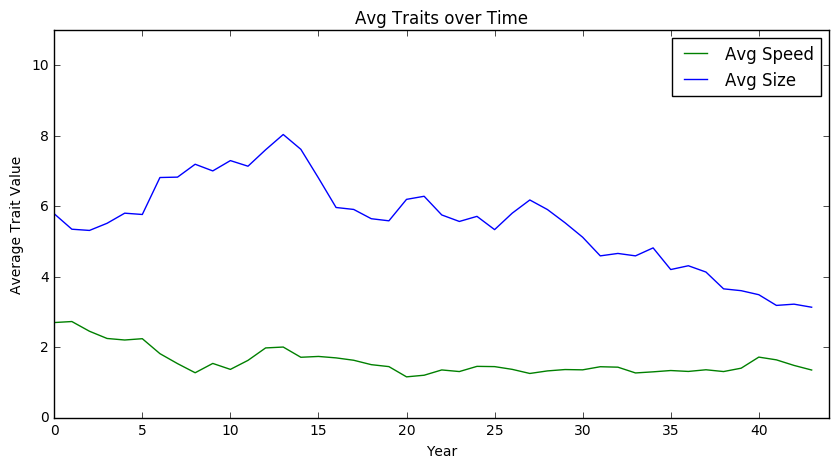

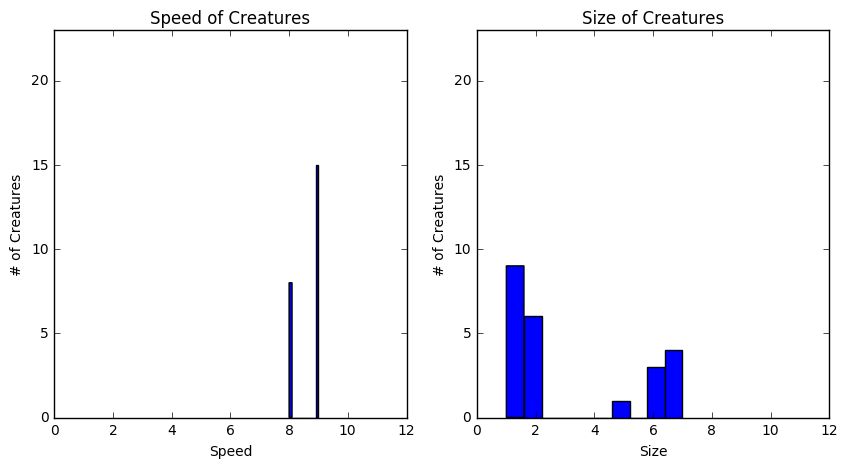

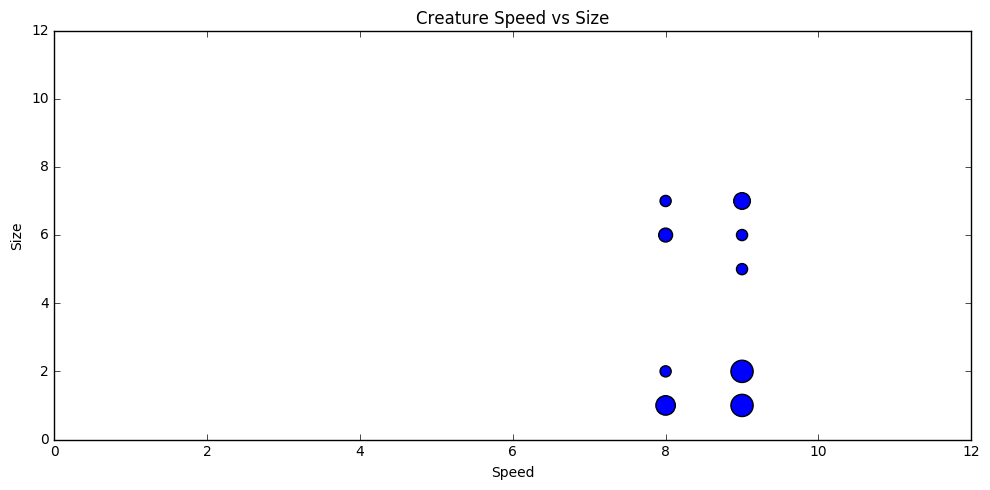

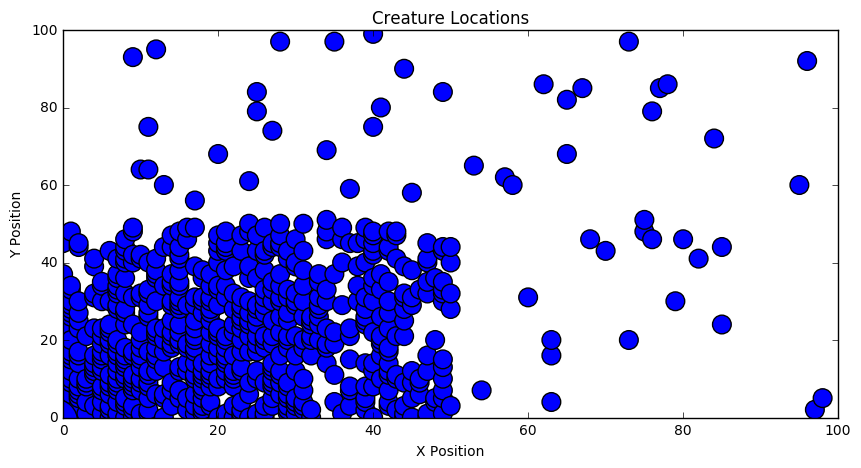

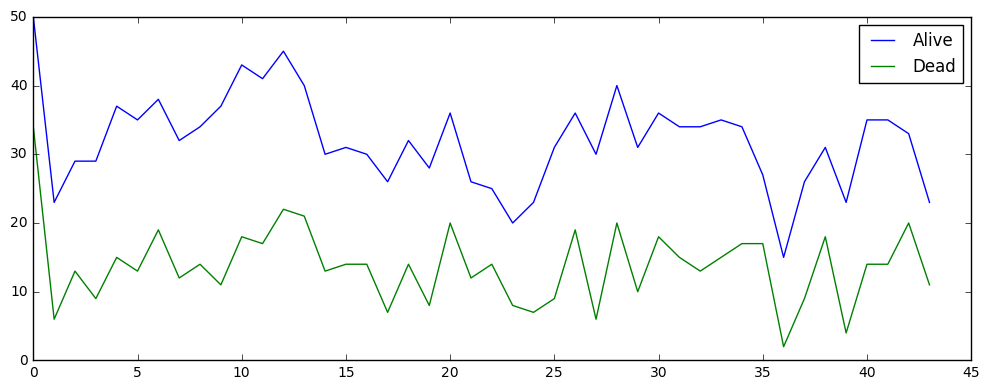

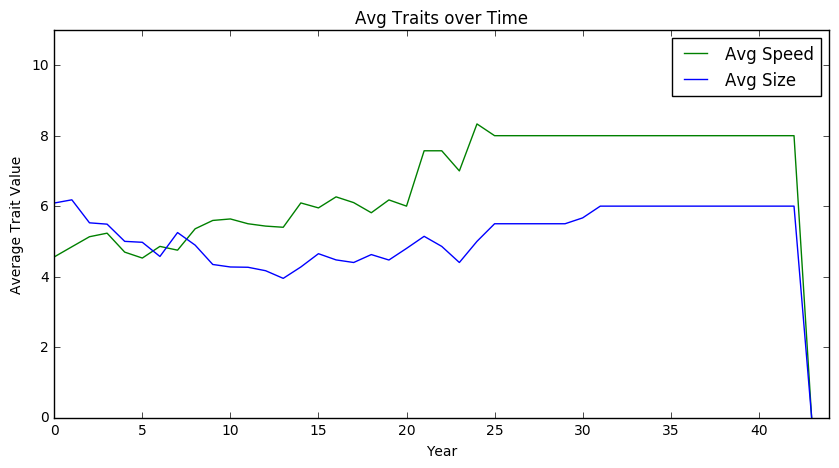

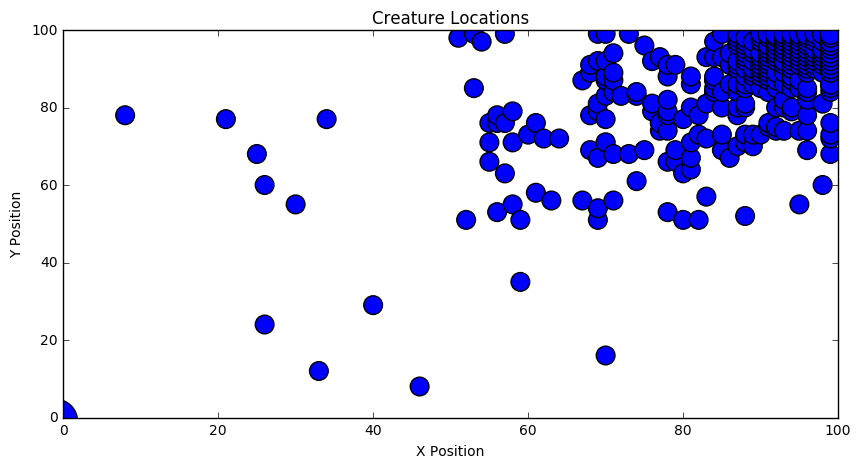

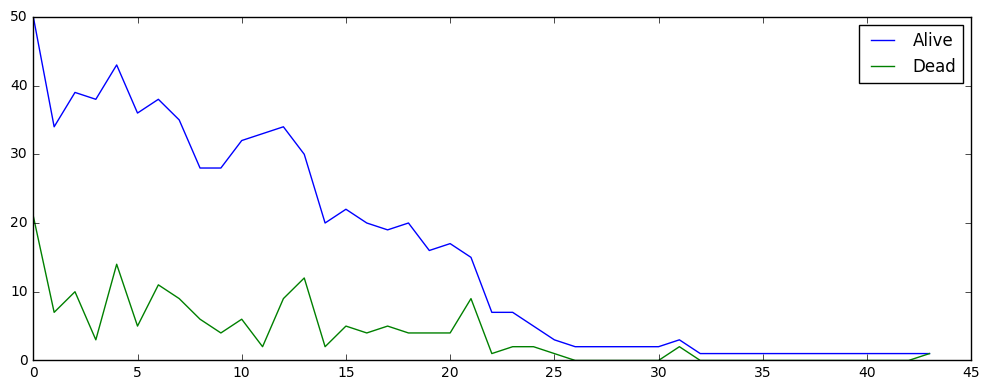

In [56]:
# Run 1 test, with plotting
#
# WARNING
# This cell will create 2 .xlsx files on your computer
#

rounds = 50
popA_amount = 50
popB_amount = 50
map_dimension = 100
food_fill = 0.8
do_plots = True
avg_spdA, avg_sizA, total_popA, avg_spdB, avg_sizB, total_popB = main(rounds, do_plots, popA_amount,popB_amount, map_dimension, food_fill)

In [45]:
# Run x tests, no plotting
#
# WARNING
# This cell will create 1 xlsx files on your computer
# This cell will take varying amounts of time to complete.
# Time to complete running this cell is determined by the number (x) of generations you want to simulate and the amount of creature instances per generation.
#

x = 2500
rounds = 50
popA_amount = 50
popB_amount = 50
map_dimension = 100
food_fill = 0.8
do_plots = False

speedsA = []
sizesA = []
populationsA = []

speedsB = []
sizesB = []
populationsB = []

for i in range(x):
    clear_output(wait=True)
    print("Loading... {:.2f}%".format(100 * (i/x)))
    avg_spdA, avg_sizA, total_popA, avg_spdB, avg_sizB, total_popB = main(rounds, do_plots, popA_amount,popB_amount, map_dimension, food_fill)
    
    speedsA.append(avg_spdA)
    sizesA.append(avg_sizA)
    populationsA.append(total_popA)
    
    speedsB.append(avg_spdB)
    sizesB.append(avg_sizB)
    populationsB.append(total_popB)
    print(' ')

pop_data = pd.DataFrame({'A Speed':speedsA,
                   'A Size':sizesA,
                   'A Population':populationsA,
                   'B Speed':speedsB,
                   'B Size':sizesB,
                   'B Population':populationsB})

writer = ExcelWriter('Darwin_Data_2500.xlsx')
pop_data.to_excel(writer,'Sheet1',index=False)
writer.save()

Loading... 99.96%
Population A
Avg Size:  5.195121951219512
Avg Speed:  0.5121951219512195
Ending Population:  41

Population B
Avg Size:  0
Avg Speed:  0
Ending Population:  0
 


In [ ]:
#679